In [ ]:
Problem Statement
I decided to treat this as a classification problem by creating a new binary variable affair 
(did the woman have at least one affair?) and trying to predict the classification for each woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 
by Redbook magazine, in which married women were asked about their participation in extramarital affairs. 
More information about the study is available in a 1978 paper from the Journal of Political Economy.
Description of Variables
The dataset contains 6366 observations of 9 variables:
rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 
                          17 = some graduate school, 20 = advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 
    4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs
Code to loading data and modules

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from __future__ import unicode_literals
dta = sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
Data Pre-Processing

In [3]:
# Load dataset
train = sm.datasets.fair.load_pandas().data

# Add 'affair' column: 1 rpresents having affair, 0 doesn't
train['affair'] = (train.affairs > 0).astype(int)

In [ ]:
Data Exploration

In [4]:
train.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [ ]:
We can see that on average, women who have affairs rate their marriages lower, which is to be expected. 
Let's take another look at the rate_marriage variable.


In [5]:
train.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [ ]:
An increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

In [ ]:
Data Visualization

<IPython.core.display.Javascript object>


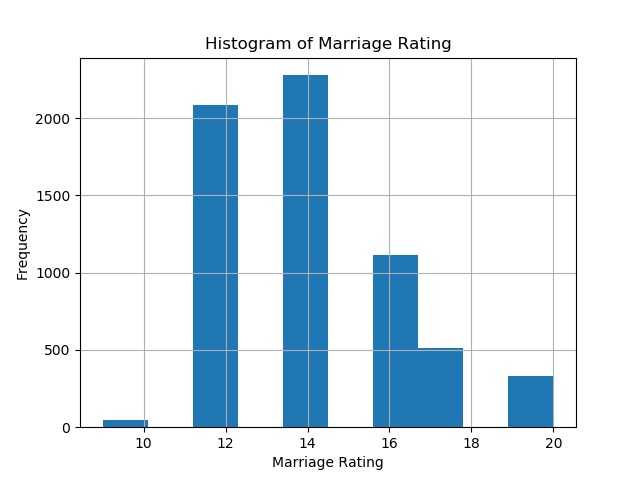

Text(0,0.5,'Frequency')

In [16]:
# show plots in the notebook
#%matplotlib notebook

#Let's start with histograms of education and marriage rating.

# histogram of education
train.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

In [18]:
# histogram of marriage rating
train.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(29.4722,0.5,'Frequency')

In [ ]:
Let's take a look at the distribution of marriage ratings for those having affairs versus those not having affairs.

<IPython.core.display.Javascript object>


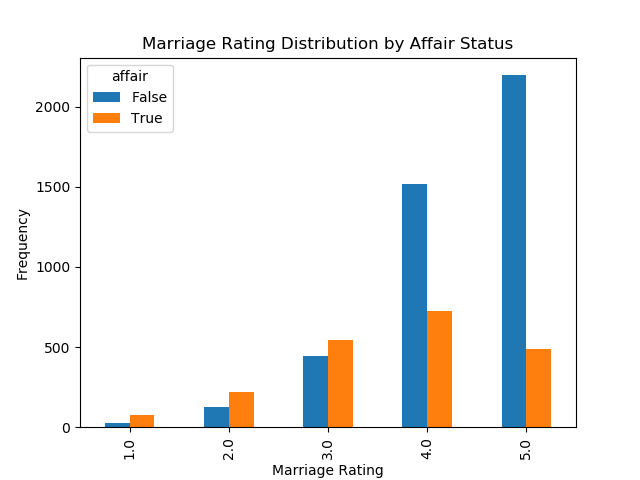

Text(0,0.5,'Frequency')

In [19]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(train.rate_marriage, train.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

In [ ]:
Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.

<IPython.core.display.Javascript object>


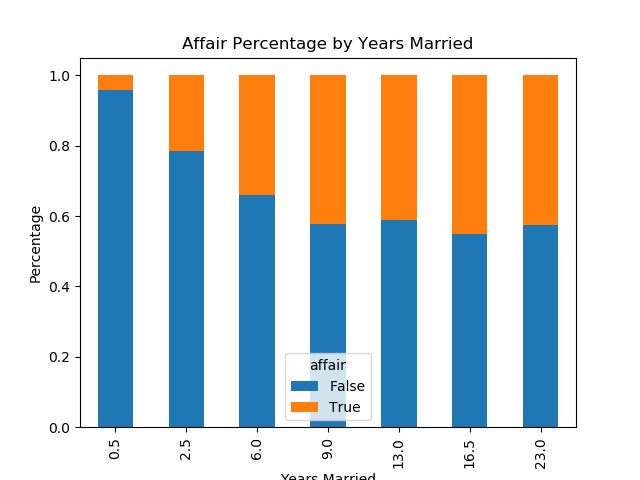

Text(0,0.5,'Percentage')

In [20]:
affair_yrs_married = pd.crosstab(train.yrs_married, train.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

In [ ]:
Prepare Data for Logistic Regression

To prepare the data, I want to add an intercept column as well as dummy variables for occupation and occupation_husb, 
since I'm treating them as categorial variables. The dmatrices function from the patsy module can do 
that using formula language.

In [21]:
train.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [23]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', train, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [ ]:
The column names for the dummy variables are ugly, so let's rename those.

In [24]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [26]:
#We also need to flatten y into a 1-D array, so that scikit-learn will properly understand it as the response variable.

# flatten y into a 1-D array
y = np.ravel(y)

In [ ]:
Logistic Regression

Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [27]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7258875274897895

In [ ]:
73% accuracy seems good, but what's the null error rate?

In [28]:
# what percentage had affairs?
y.mean()

0.3224945020420987

In [ ]:
Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". 
So we're doing better than the null error rate, but not by much.

Let's examine the coefficients to see what we learn.

In [32]:
# examine the coefficients
#coef = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))
coef = pd.DataFrame(list(zip(X.columns,np.transpose(model.coef_))))
coef

,0,1
0,Intercept,[1.4898360570592706]
1,occ_2,[0.1880663965967619]
2,occ_3,[0.4989481225612341]
3,occ_4,[0.2506681436923961]
4,occ_5,[0.8390080011190776]
5,occ_6,[0.8339082482822548]
6,occ_husb_2,[0.19063622424850235]
7,occ_husb_3,[0.29783290491447884]
8,occ_husb_4,[0.16140913839761342]
9,occ_husb_5,[0.18777109156281066]
